Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
number_of_points = 1000
x_point = []
y_point = []

In [3]:
a = 0.22
b = 0.78

In [4]:
for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = (a*x+b)+np.random.normal(0.0,0.1)
    x_point.append(x)
    y_point.append(y)

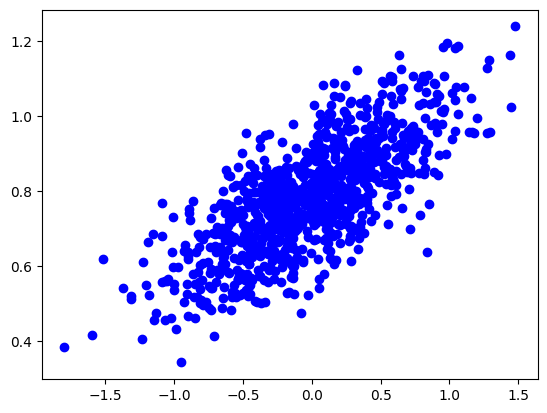

In [5]:
plt.scatter(x_point,y_point,c='b')
plt.show()

In [6]:
real_x = np.array(x_point)
real_y = np.array(y_point)

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Definiujemy model:

In [8]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [9]:
model.add(Dense(units = 1, use_bias=True, input_dim=1, activation = "linear"))

Definiujemy **optymalizator** i **błąd** (średni błąd kwadratowy - MSE). **Współczynnik uczenia = 0.1**

In [10]:
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [11]:
model.compile(loss='MSE',optimizer=opt)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Proces **uczenia**:

In [13]:
epochs = 1000
h = model.fit(real_x,real_y, verbose=0, epochs=epochs, batch_size=100)

In [14]:
Loss = h.history['loss']
Loss

[0.3101126551628113,
 0.060144323855638504,
 0.027098899707198143,
 0.015876824036240578,
 0.011836524121463299,
 0.010386496782302856,
 0.009879999794065952,
 0.009716641157865524,
 0.009642502292990685,
 0.00961325503885746,
 0.009594238363206387,
 0.009597319178283215,
 0.009598718956112862,
 0.009596272371709347,
 0.009610219858586788,
 0.009601403027772903,
 0.009601065889000893,
 0.009600374847650528,
 0.009598000906407833,
 0.009595959447324276,
 0.009600017219781876,
 0.009622625075280666,
 0.009596709161996841,
 0.009598283097147942,
 0.009595352225005627,
 0.009602024219930172,
 0.009598148055374622,
 0.009593025781214237,
 0.00961326528340578,
 0.00960523821413517,
 0.009602325968444347,
 0.009597972966730595,
 0.009596786461770535,
 0.009606550447642803,
 0.009608802385628223,
 0.009602708742022514,
 0.009604726918041706,
 0.009610526263713837,
 0.009608864784240723,
 0.00960397906601429,
 0.009609226137399673,
 0.009607880376279354,
 0.00959981232881546,
 0.009591641835868

Sprawdźmy jakie są **wartości wag**:

In [15]:
weights = model.get_weights()

print(weights[0][0][0])
print(weights[1][0])    #bias

0.21978667
0.7881504


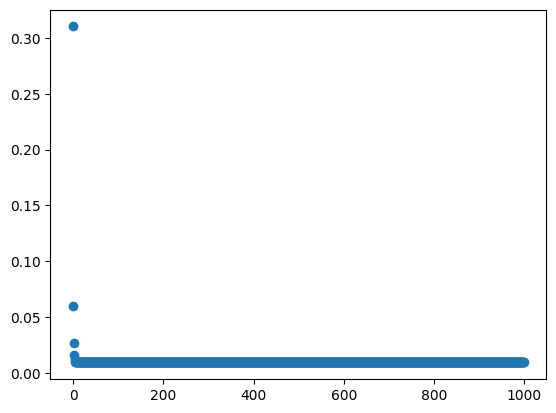

In [16]:
plt.scatter(np.arange(epochs),Loss)
plt.show()